In [27]:
import pandas as pd

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

confirmed_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)
confirmed_df.head()
#deaths_df.sum()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [28]:
deaths_df.head()
#deaths_df.sum()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [29]:
global_covid_df = pd.DataFrame({
    'Date': confirmed_df.columns[4:],
    'ConfirmedCases': confirmed_df.iloc[:, 4:].sum(axis=0),
    'Deaths': deaths_df.iloc[:, 4:].sum(axis=0)
})

global_covid_df = global_covid_df.rename(columns={'Date': 'date'})


global_covid_df.tail()

,date,ConfirmedCases,Deaths
3/5/23,3/5/23,676024901,6877749
3/6/23,3/6/23,676082941,6878115
3/7/23,3/7/23,676213378,6879038
3/8/23,3/8/23,676392824,6880483
3/9/23,3/9/23,676570149,6881802


In [30]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\kunja\anaconda3\lib\site-packages\huggingface_hub-0.17.3-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


#API_KEY = "CTIEAMvghfytfGIY"

In [31]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\kunja\anaconda3\lib\site-packages\huggingface_hub-0.17.3-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [32]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

# Function to fetch stock data
def fetch_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data

api_key = 'CTIEAMC79CF4UGIY'

# Overall American Market
american_market_stock = fetch_stock_data('SPY', api_key)

# Overall Canadian Market
canadian_market_stock = fetch_stock_data('EWC', api_key)

# Travel Sector
travel_stock = fetch_stock_data('DAL', api_key)

# Real Estate Sector
real_estate_stock = fetch_stock_data('VNQ', api_key)

# Precious Metals
precious_metals_stock = fetch_stock_data('GOLD', api_key)

# Display the fetched data (example for Overall American Market)
print("Overall American Market Stock Data:")
#print(american_market_stock.tail())


stock_dataframes = [american_market_stock, canadian_market_stock, travel_stock, real_estate_stock, precious_metals_stock]

# Rename columns in all dataframes
for df in stock_dataframes:
    df.rename(columns={
        '1. open': 'Open',
        '2. high': 'High',
        '3. low': 'Low',
        '4. close': 'Close',
        '5. volume': 'Volume'
    }, inplace=True)
print(american_market_stock.tail())

Overall American Market Stock Data:
                Open      High       Low     Close     Volume
date                                                         
1999-11-05  138.6250  139.1093  136.7812  137.8750  7431500.0
1999-11-04  136.7500  137.3593  135.7656  136.5312  7907500.0
1999-11-03  136.0000  136.3750  135.1250  135.5000  7222300.0
1999-11-02  135.9687  137.2500  134.5937  134.5937  6516900.0
1999-11-01  136.5000  137.0000  135.5625  135.5625  4006500.0


In [33]:

global_covid_df['date'] = pd.to_datetime(global_covid_df['date'])
american_market_stock.reset_index(inplace=True)
american_market_stock['date'] = pd.to_datetime(american_market_stock['date'])



global_covid_df = pd.merge(global_covid_df, american_market_stock, how='left', on='date')
global_covid_df.tail()
#global_covid_df.to_csv('Global Covid-19.csv', index=False)

,date,ConfirmedCases,Deaths,Open,High,Low,Close,Volume
1138,2023-03-05,676024901,6877749,NaN,NaN,NaN,NaN,NaN
1139,2023-03-06,676082941,6878115,405.05,407.45,404.010,404.47,72795946.0
1140,2023-03-07,676213378,6879038,404.42,404.67,397.625,398.27,108310596.0
1141,2023-03-08,676392824,6880483,398.39,399.71,396.590,398.92,74746632.0
1142,2023-03-09,676570149,6881802,399.74,401.48,390.530,391.56,111945322.0


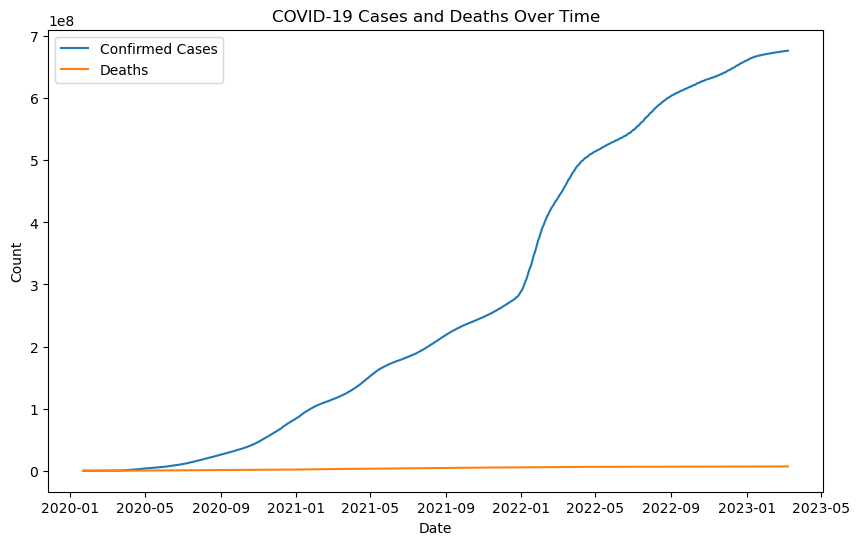

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(global_covid_df['date'], global_covid_df['ConfirmedCases'], label='Confirmed Cases')
plt.plot(global_covid_df['date'], global_covid_df['Deaths'], label='Deaths')
plt.title('COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(global_covid_df['Date'], global_covid_df['close_x'], label='Closing Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Dual Axis plots in Python

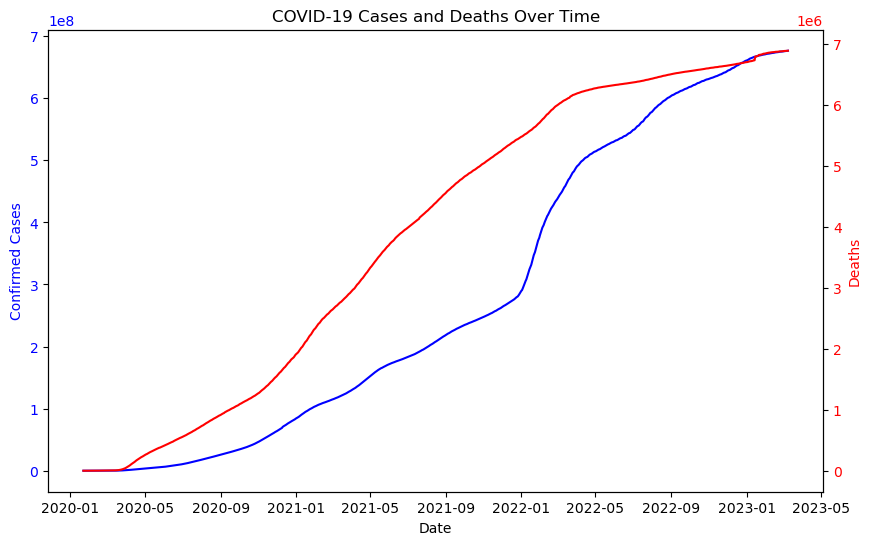

In [40]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis (blue)
ax1.plot(global_covid_df['date'], global_covid_df['ConfirmedCases'], label='Confirmed Cases', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Confirmed Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis (red)
ax2 = ax1.twinx()
ax2.plot(global_covid_df['date'], global_covid_df['Deaths'], label='Deaths', color='red')
ax2.set_ylabel('Deaths', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('COVID-19 Cases and Deaths Over Time')
plt.show()
